Desafío realizado por Cristóbal Novoa

# Desafío - Mecanismos de Votación

● Para realizar este desafío debes haber estudiado previamente todo el material
disponibilizado correspondiente a la unidad.

● Una vez terminado el desafío, comprime la carpeta que contiene el desarrollo de los
requerimientos solicitados y sube el .zip en el LMS.

● Desarrollo desafío:

○ El desafío se debe desarrollar de manera Individual.

○ Para la realización del desafío necesitarás apoyarte del archivo Apoyo
Desafío - Mecanismos de Votación.

# Requerimientos

Para esta actividad desarrollaremos un ensamble heterogéneo que prediga la popularidad o
impopularidad de contenido en línea de un sitio web. El archivo csv tiene un total de 39797
registros, donde cada uno representa características del artículo publicado en el sitio web.
Cada registro tiene un total de 61 atributos que miden características del texto, cantidad de
imágenes, keywords, etc. Los artículos provienen de la publicación K. Fernandes, P. Vinagre
and P. Cortez. A Proactive Intelligent Decision Support System for Predicting the Popularity
of Online News. Proceedings of the 17th EPIA 2015 - Portuguese Conference on Artificial
Intelligence, September, Coimbra, Portugal.. Los artículos registrados son de la página web.
Más información sobre los atributos se puede encontrar en el archivo
OnlineNewsPopularity.names.

# Ejercicio 1 - Preparación del Ambiente de Trabajo

● A continuación se le presenta un código que agrupa las variables por grupos. Cada
uno de éstos hace referencia a alguna característica de los registros en la base de
datos. Genere una análisis descriptivo de cada uno de los atributos. Puede utilizar la
función grid_plot_batch que se encuentra en el archivo helpers.py.

`df.columns = [i.replace(' ', '') for i in df.columns]`
`df = df.loc[:, 'n_tokens_title':'shares']`
`qnty = df.filter(regex='^n_', axis=1)`
`channel = df.filter(regex='^data_', axis=1)`
`days = df.filter(regex=re.compile("weekday|weekend"), axis=1)`
`sentiments = df.filter(regex=re.compile("negative|positive|subjectivity"), axis=1)`
`lda = df.filter(regex='^LDA_\d', axis=1)`
`keywords = df.filter(regex='^kw_', axis=1)` 

● Describa el comportamiento de las variables.

● Dada la naturaleza de los atributos, es probable que algunas mediciones estén
correlacionadas entre sí. Para ello, genere un diagnóstico previo de multicolinealidad
utilizando la función identify_high_correlations que se encuentra en el archivo
helpers.py. Para todos aquellos atributos que tengan una correlación de .8, reporte
sus nombres.

● Antes de generar los conjuntos de entrenamiento y validación, pre procese los datos
con los siguientes pasos:

○ Recodifique la variable shares en una variable binaria que identifique como 1
todos los registros con más de 1400 "compartir" y 0 de lo contrario. Para
evitar multicolinealidad, elimine la variable shares posteriormente.

○ Elimine todas las variables que presentaban una correlación mayor a .8. Este
paso es para evitar la multicolinealidad de los atributos.

○ Genere un análisis de Componentes Principales para extraer las principales
30 dimensiones. Guarde estas dimensiones en un nuevo objeto.

In [107]:
#Se importan librerias
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 6)
import re

In [108]:
#Se carga csv
df = pd.read_csv('OnlineNewsPopularity.csv')

In [109]:
df.shape

(39644, 61)

In [110]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [111]:
df.shape

(39644, 61)

In [112]:
#Estadísticas descriptivas
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [113]:
#Valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [114]:
#Aplicacion del script
df.columns = [i.replace(' ', '') for i in df.columns]
df = df.loc[:, 'n_tokens_title':'shares']
qnty = df.filter(regex='^n_', axis=1)
channel = df.filter(regex='^data_', axis=1)
days = df.filter(regex=re.compile("weekday|weekend"), axis=1)
sentiments = df.filter(regex=re.compile("negative|positive|subjectivity"), axis=1)
lda = df.filter(regex='^LDA_\d', axis=1)
keywords = df.filter(regex='^kw_', axis=1)

In [115]:
df.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [116]:
#Aplicacion de funcion para graficar las variables
def charts(df):
    rows = df.shape[1] 
    plt.figure(figsize=(16,20))
    for index, (colname, serie) in enumerate(df.iteritems()):
        plt.subplot(rows, 2, index + 1)
        if pd.api.types.is_float_dtype(serie) is True or pd.api.types.is_integer_dtype(serie) is True:
            sns.distplot(serie)
            plt.axvline(np.mean(serie), color='tomato',  lw = 2, linestyle='--', label = f'mean {serie}')
            plt.axvline(np.median(serie), color = 'Darkblue', lw =2, linestyle='--', label = f'median {serie}')
            plt.legend(['mean','median'])
            
        elif pd.api.types.is_object_dtype(serie) is True:
            
            sns.countplot(serie)
            plt.axhline(serie.value_counts().mean(), color='forestgreen', linestyle='--', lw = 2, 
                        label = f'mean {serie}')
            plt.legend(['mean'])
        plt.title(colname, fontsize=16)
        plt.tight_layout()

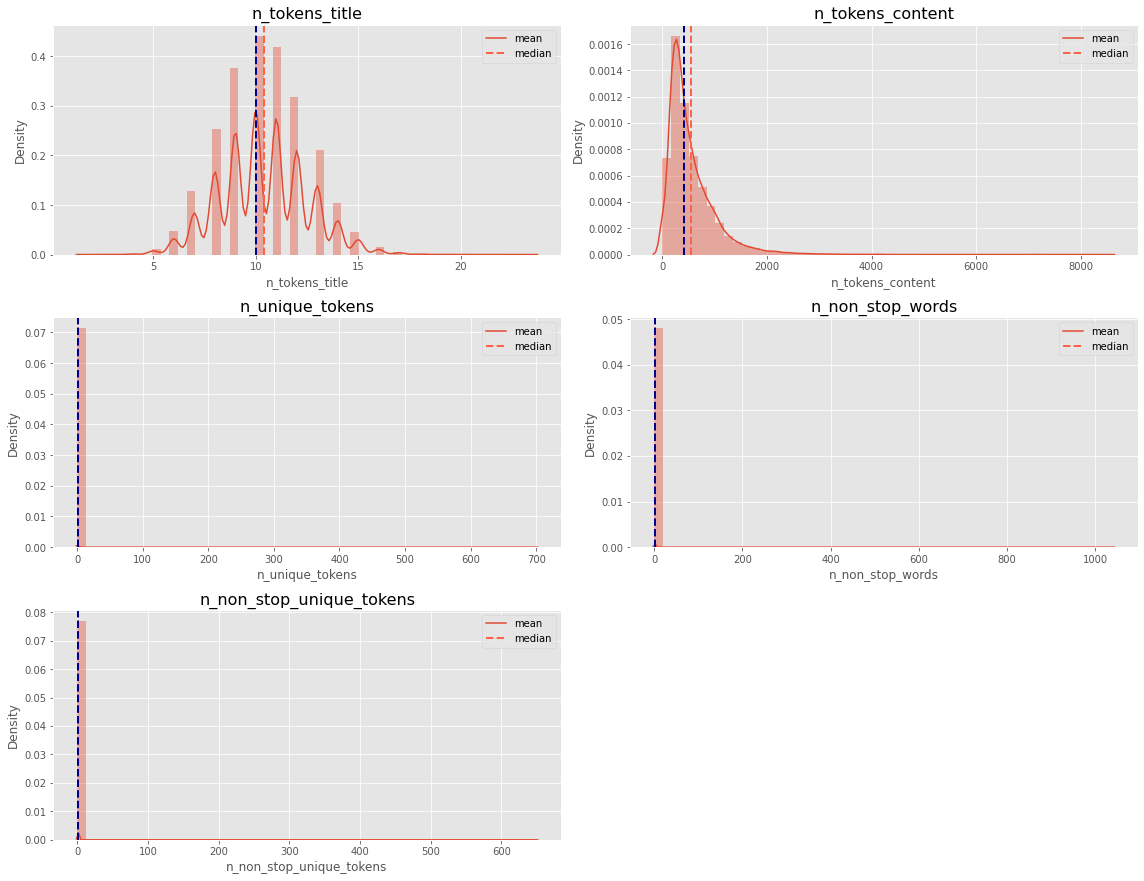

In [117]:
#Aplicacion de la funcion charts
charts(qnty)

A diferencia de n_tokens_title todos los atributos tienen un fuerte sesgo hacia los valores iniciales

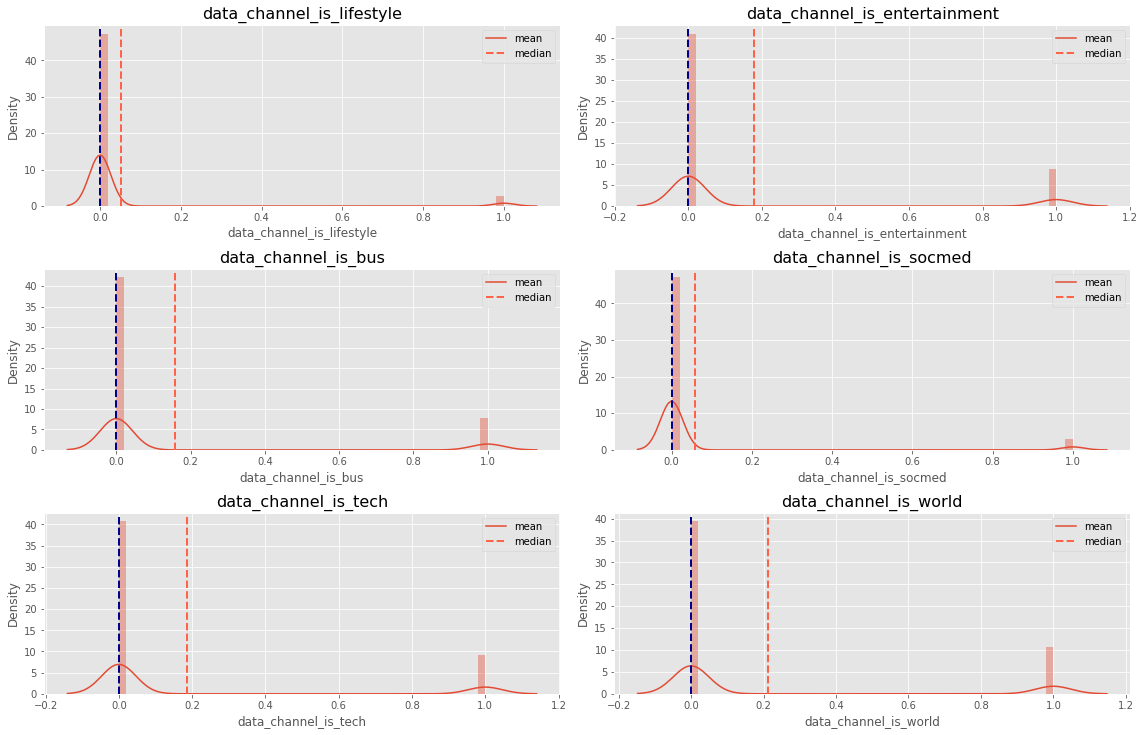

In [118]:
charts(channel)

Hay una fuerte sesgo hacia los valores iniciales en la mayoría de los atributos

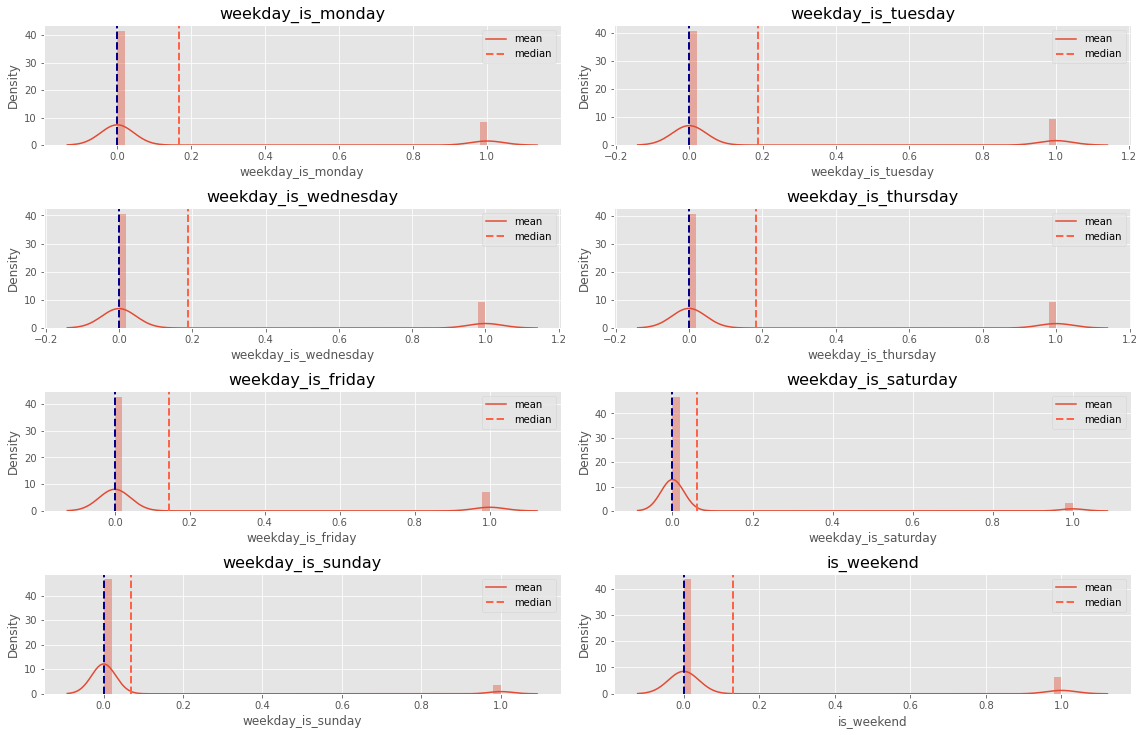

In [119]:
charts(days)

Hay una fuerte sesgo hacia los valores iniciales en la mayoria de los atributos iniciales

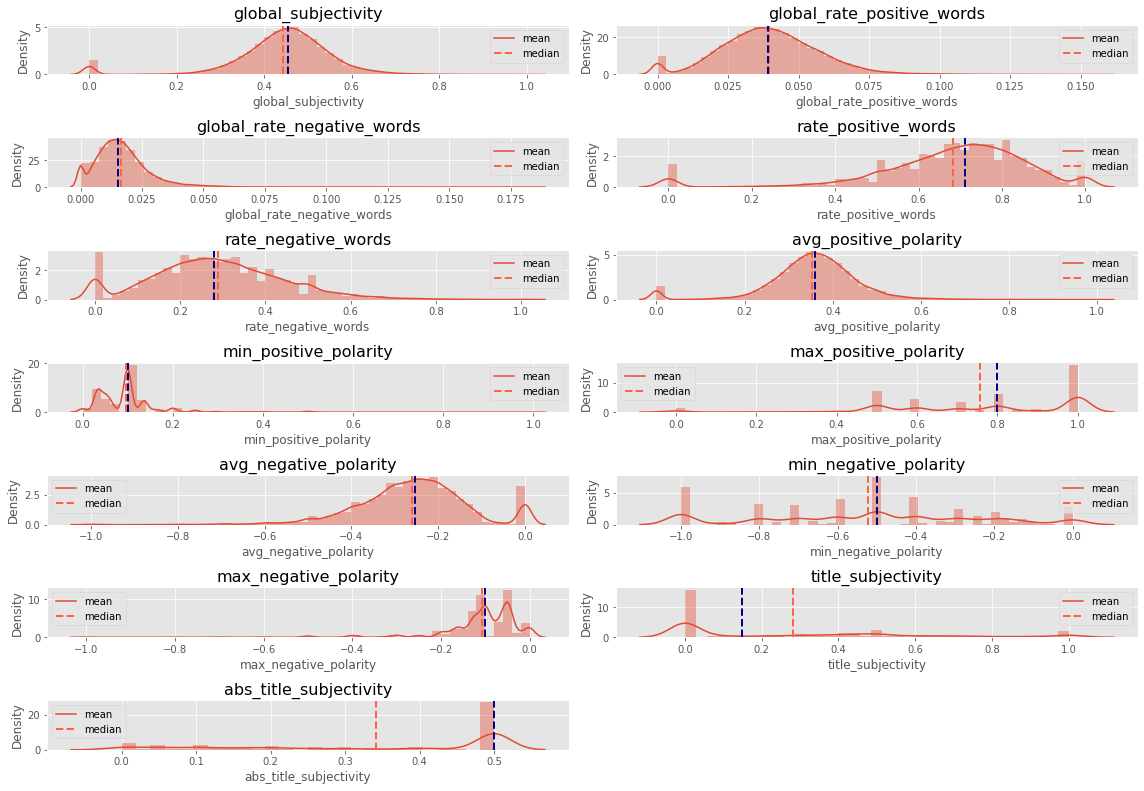

In [120]:
charts(sentiments)

Hay una fuerte sesgo hacia los valores iniciales en global_rate_negative, title_subjectivity. Otras variables como avg_positive_polarity se comportan de manera normal y variables como max_positive_polarity tienen sesgo hacia los valores finales

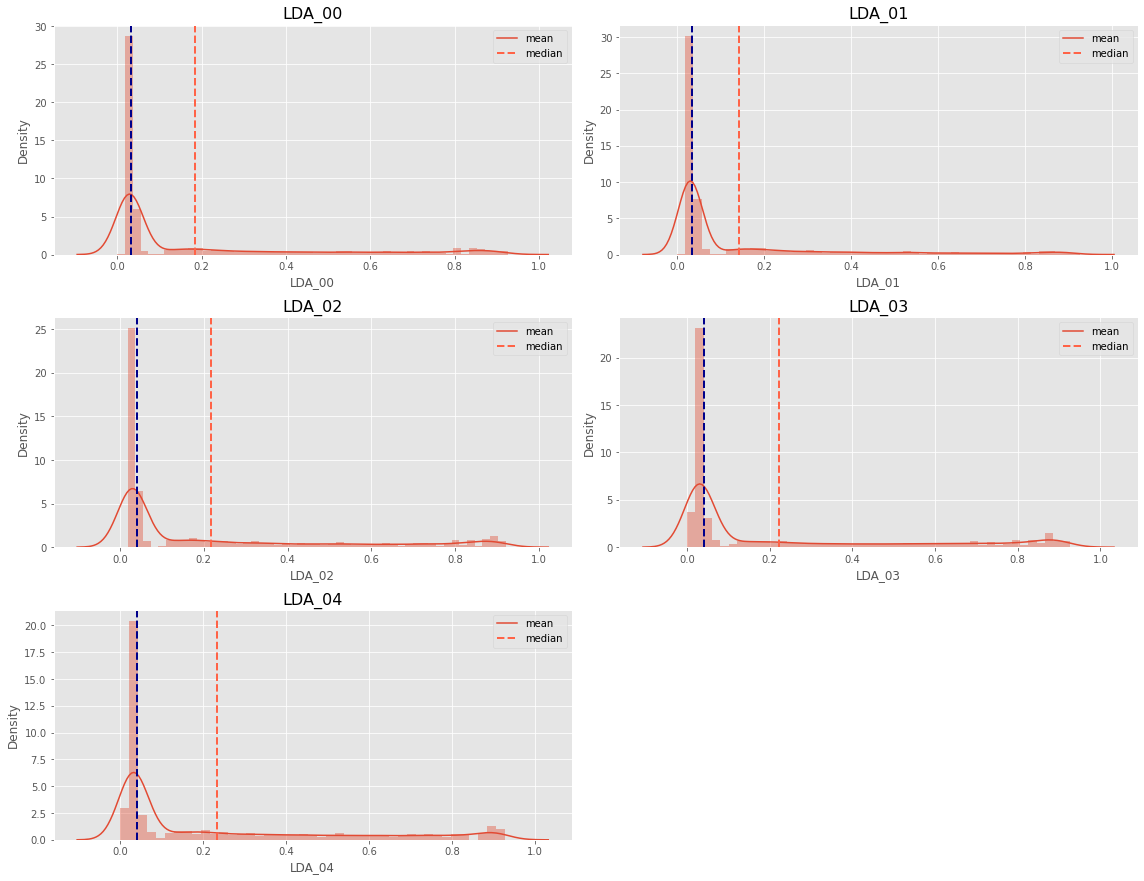

In [121]:
charts(lda)

Hay una fuerte sesgo hacia los valores iniciales en todos los atributos del grupo lda

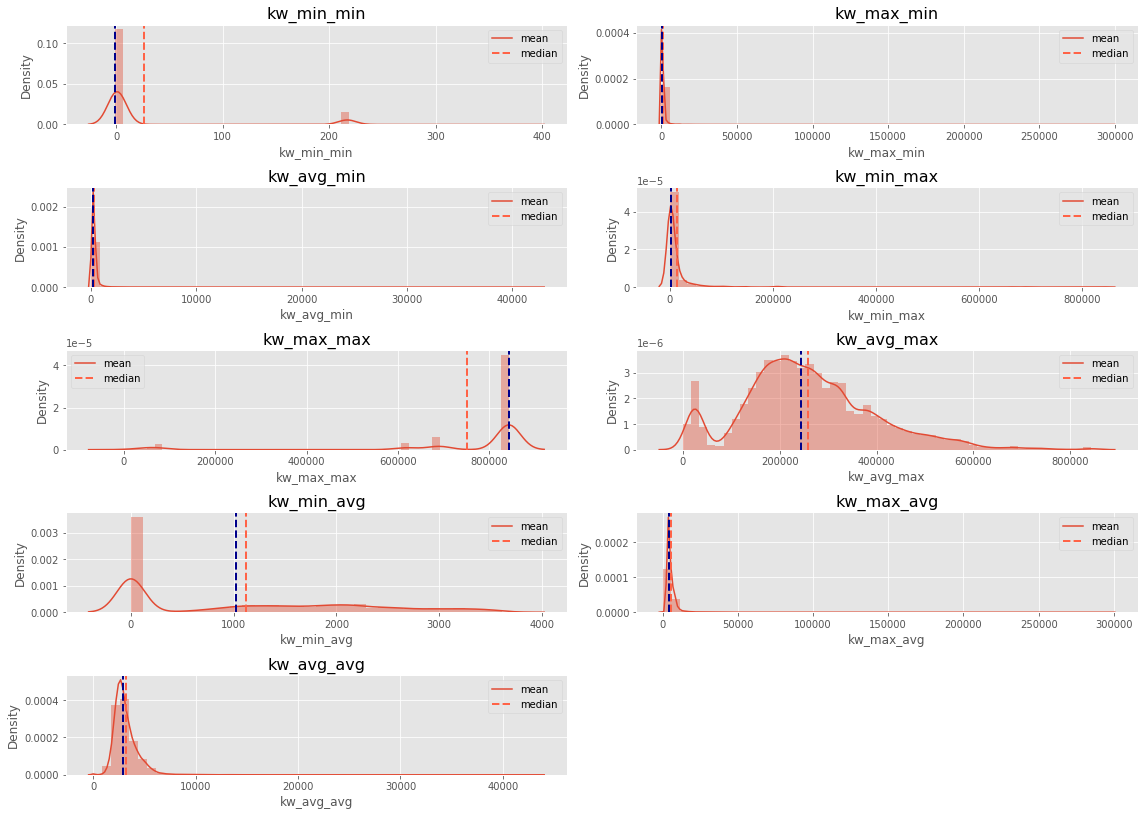

In [122]:
charts(keywords)

Hay una fuerte sesgo hacia los valores iniciales en la mayoria de las variables agrupadas en keywords

In [123]:
#Se aplica funcion para identivar altas correlaciones
def identify_high_correlations(df, threshold=.8):

    # extraemos la matriz de correlación con una máscara booleana
    tmp = df.corr().mask(abs(df.corr()) < .8, df)
    # convertimos a long format
    tmp = pd.melt(tmp)
    # agregamos una columna extra que nos facilitará los cruces entre variables
    tmp['var2'] = list(df.columns) * len(df.columns)
    # reordenamos
    tmp = tmp[['variable', 'var2', 'value']].dropna()
    # eliminamos valores duplicados
    tmp = tmp[tmp['value'].duplicated()]
    # eliminamos variables con valores de 1 
    return tmp[tmp['value'] < 1.00]

In [124]:
#Se aplica la funcion declarada
identify_high_correlations(df, threshold=.8)

,variable,var2,value
179,n_non_stop_words,n_unique_tokens,0.999572
238,n_non_stop_unique_tokens,n_unique_tokens,0.999852
239,n_non_stop_unique_tokens,n_non_stop_words,0.999532
1139,kw_avg_min,kw_max_min,0.940529
1256,kw_max_max,kw_min_min,-0.857226
1499,kw_avg_avg,kw_max_avg,0.811864
1678,self_reference_avg_sharess,self_reference_min_shares,0.818907
1679,self_reference_avg_sharess,self_reference_max_shares,0.853480
2317,LDA_02,data_channel_is_world,0.836618


In [125]:
#Binarizacion variable shares
df['shares'] = np.where(df['shares'] >= 1400, 1, 0)

In [126]:
#eliminacion de variables con altas correlaciones
df.drop(['n_non_stop_words', 'n_unique_tokens','n_non_stop_unique_tokens', 'kw_avg_min','kw_max_min',	
        'kw_max_max','kw_min_min','kw_avg_avg','kw_max_avg',	
	     'self_reference_avg_sharess','self_reference_min_shares',	
	     'self_reference_avg_sharess','self_reference_max_shares', 'LDA_02', 
        'data_channel_is_world'], axis=1, inplace = True)

In [127]:
#Se muestra el dataframe
df.head()

,n_tokens_title,n_tokens_content,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,0
1,9.0,255.0,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,0
2,9.0,211.0,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1
3,9.0,531.0,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,0
4,13.0,1072.0,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,0


In [134]:
#Se importan librerías
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [133]:
#Se indican las columnas
df.columns

Index(['n_tokens_title', 'n_tokens_content', 'num_hrefs', 'num_self_hrefs',
       'num_imgs', 'num_videos', 'average_token_length', 'num_keywords',
       'data_channel_is_lifestyle', 'data_channel_is_entertainment',
       'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech',
       'kw_min_max', 'kw_avg_max', 'kw_min_avg', 'weekday_is_monday',
       'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday',
       'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday',
       'is_weekend', 'LDA_00', 'LDA_01', 'LDA_03', 'LDA_04',
       'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subje

In [202]:
#Se separan muestras, se escalan la matriz de entrenamiento y test
X = df.loc[:,'n_tokens_title':'abs_title_sentiment_polarity']
y = df['shares']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 4982)
scaler = StandardScaler().fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [203]:
#Se aplica PCA para determinar componentes principales
pca_train = PCA(n_components = 30, svd_solver='full').fit_transform(x_train_scaled)
pca_test = PCA(n_components = 30, svd_solver='full').fit_transform(x_test_scaled)


In [204]:
#Se generan sets de entrenamiento y test post-PCA
x_train_pca = pd.DataFrame(pca_train)
x_test_pca = pd.DataFrame(pca_test)

# Ejercicio 2 - Evaluación de modelos individuales

● A continuación generará una serie de modelos que se incorporarán posteriormente
al comité de votación. Para ello, se solicita que:

○ Importe los módulos correctamente.

○ Para cada uno de ellos, genere un reporte en las métricas de desempeño
respecto a Precision, Recall, F1. Puede hacer uso de la función
plot_classification_report disponible en el archivo helpers.py.

○ Comente el desempeño general de cada uno.

● La lista de modelos es la siguiente. Cabe destacar que la mayoría de éstos
corresponden a implementaciones vanilla, salvo que se indique lo contrario:

○ Regresión Logística.

○ Algoritmo de KMedias.

○ Árbol de Clasificación con un max_depth=1.

○ Árbol de Clasificación con un max_depth=4.

# K-means no funciona

In [249]:
#Se importan librerías 
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import classification_report

In [250]:
#Se indica semilla seudoaleatoria
rep_seed= 4982

In [262]:
# definimos el comité de clasificadores en una lista de tuplas
estimators = [('LogisticRegression',
LogisticRegression(random_state = rep_seed)),
('Decision Tree Classifier one',
DecisionTreeClassifier(random_state=rep_seed, max_depth = 1)),
('Decision Tree Classifier four',
DecisionTreeClassifier(random_state=rep_seed, max_depth = 4))]
estimators[4:]

[]

In [263]:
#Se genera funcion para indicar metricas de clasificacion
def plot_classification_report(y_test, class_pred, dummy_class=False):
    """TODO: Docstring for plot_classification_report.

    :y_test: TODO
    :class_pred: TODO
    :dummy_class: TODO
    :returns: TODO

    """

    colors = ['dodgerblue', 'tomato']
    report = pd.DataFrame(classification_report(y_test, class_pred, output_dict=True))
    class_specific_values = report.drop(columns=['accuracy', 'macro avg', 'weighted avg'])
    class_specific_values = report.loc[:, class_specific_values.columns].T
    macro_avg = report.drop(index='support')['macro avg']

    for index, value in enumerate(class_specific_values.index):
        plt.scatter(class_specific_values['precision'][value], [1], marker='x', c=colors[index])
        plt.scatter(class_specific_values['recall'][value], [2], marker='x', c=colors[index])
        plt.scatter(class_specific_values['f1-score'][value], [3], marker='x', c=colors[index], label=f"Class: {index}")

    plt.scatter(macro_avg, [1, 2, 3], color='forestgreen', label='Macro Average')
    plt.yticks([1.0, 2.0, 3.0], ['Precision', 'Recall', 'F1-Score'])

    if dummy_class is True:
        plt.axvline(.5, label = '.5 Boundary', linestyle='--')

    plt.legend(loc='center left', bbox_to_anchor=(1, .5))

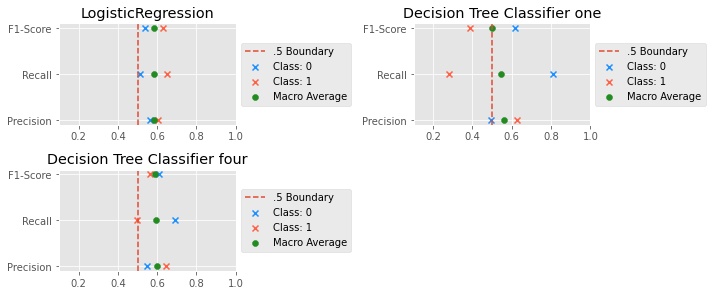

In [264]:
#Se reportan las graficas en los modelos indicados.
for index, value in enumerate(estimators):
    plt.subplot(3, 2, index + 1)
    plt.title(value[0])
    class_pred = value[1].fit(x_train_pca, y_train).predict(x_test_pca)
    plot_classification_report(y_test, class_pred, dummy_class=True)
    plt.xlim((0.1, 1.0))
    if (index + 1) % 2 == 0:
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()

# Ejercicio 3 - Entrenamiento de Comité

● Entrene el comité de clasificadores sin modificar el esquema de votación.

● Reporte el desempeño a nivel de cada clase para cada métrica.

In [265]:
# VotingClassifier requiere de la lista de tuplas que definimos arriba
voting_classifier = VotingClassifier(estimators).fit(x_train_pca, y_train)

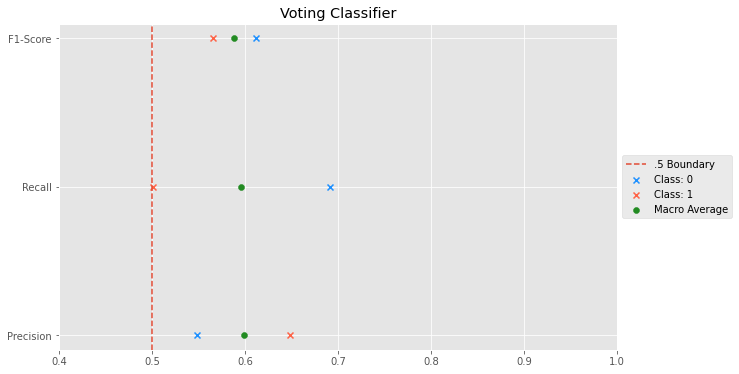

In [267]:
#Se reporta la graficas con las metricas f1-score, recall y precision
plot_classification_report(y_test,voting_classifier.fit(x_train_pca,y_train).predict(x_test_pca), dummy_class=True)
plt.xlim((0.4, 1.0))
plt.title('Voting Classifier');
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Ejercicio 4 - Calibración de Comité con Ponderadores

● En base al comportamiento de los clasificadores individuales del ensamble,
proponga dos esquemas de ponderación para mejorar el desempeño del modelo.

● Reporte el desempeño del mejor ensamble heterogéneo.